In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style to resemble 'plotly_white'
sns.set_style("whitegrid")

# Optionally, you can use plt.rcParams to further customize the plot appearance
plt.rcParams.update({
    'axes.edgecolor': 'black',
    'axes.grid': True,
    'grid.color': 'lightgray',
    'grid.linestyle': '-',
    'axes.facecolor': 'white'
})


In [51]:
data = pd.read_csv("Instagram_data.csv", encoding='latin-1')

In [ ]:
print(data.head())

In [ ]:
print(data.columns)

In [ ]:
print(data.info())

In [ ]:
print(data.describe())

In [ ]:
print(data.isnull().sum())

In [ ]:
# Create a histogram using Matplotlib
plt.figure(figsize=(8, 6))  # Set the figure size

plt.hist(data['Impressions'], bins=10, edgecolor='black')  # Create the histogram with 10 bins
plt.title('Distribution of Impressions')  # Add the title
plt.xlabel('Impressions')  # Label x-axis
plt.ylabel('Frequency')  # Label y-axis

plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines similar to Plotly
plt.show()  # Display the plot

In [ ]:
# Create a line plot using Matplotlib
plt.figure(figsize=(10, 6))  # Set figure size

plt.plot(data.index, data['Impressions'], marker='o', color='b')  # Create the line plot
plt.title('Impressions Over Time')  # Add title
plt.xlabel('Time')  # Label x-axis
plt.ylabel('Impressions')  # Label y-axis

plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout()  # Adjust the padding around the plot
plt.show()  # Display the plot

In [ ]:
# Create a line plot using Matplotlib
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot each metric as a line on the same figure
plt.plot(data.index, data['Likes'], label='Likes', marker='o', color='b')
plt.plot(data.index, data['Saves'], label='Saves', marker='s', color='g')
plt.plot(data.index, data['Follows'], label='Follows', marker='^', color='r')

# Add titles and labels
plt.title('Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Count')

# Show a legend for the lines
plt.legend()

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Data for the pie chart
reach_sources = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
reach_counts = [data[source].sum() for source in reach_sources]

# Colors for the pie chart
colors = ['#FFB6C1', '#87CEFA', '#90EE90', '#FFDAB9']

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))  # Set the figure size

plt.pie(reach_counts, labels=reach_sources, colors=colors, 
        autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Reach from Different Sources')

# Ensure that pie chart is a circle
plt.axis('equal')

# Display the chart
plt.show()

In [ ]:
# Data for the pie chart
engagement_metrics = ['Saves', 'Comments', 'Shares', 'Likes']
engagement_counts = [data[metric].sum() for metric in engagement_metrics]

# Colors for the pie chart
colors = ['#FFB6C1', '#87CEFA', '#90EE90', '#FFDAB9']

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))  # Set the figure size

plt.pie(engagement_counts, labels=engagement_metrics, colors=colors, 
        autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Engagement Sources')

# Ensure that the pie chart is a circle
plt.axis('equal')

# Display the chart
plt.show()

In [ ]:
from wordcloud import WordCloud

# Generate the word cloud
hashtags = ' '.join(data['Hashtags'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags)

# Create a plot using Matplotlib
plt.figure(figsize=(10, 5))  # Set the figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud
plt.axis('off')  # Hide the axes
plt.title('Hashtags Word Cloud')  # Add title
plt.tight_layout()  # Adjust layout

# Display the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Inspect the data types of the columns
print(data.dtypes)

# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Check if numeric_data is empty or if there are still non-numeric columns
if numeric_data.empty:
    print("No numeric columns available for correlation.")
else:
    # Compute the correlation matrix
    corr_matrix = numeric_data.corr()

    # Create a heatmap using Seaborn
    plt.figure(figsize=(10, 8))  # Set the figure size
    sns.heatmap(corr_matrix, 
                annot=True,           # Show correlation coefficients
                fmt='.2f',           # Format the coefficients
                cmap='RdBu',         # Color map
                vmin=-1,             # Minimum value for color scaling
                vmax=1,              # Maximum value for color scaling
                center=0,            # Center the color scale
                square=True,         # Make squares for each cell
                cbar_kws={"shrink": .8})  # Color bar size

    # Add title and labels
    plt.title('Correlation Matrix')
    plt.xlabel('Features')
    plt.ylabel('Features')

    # Display the plot
    plt.tight_layout()
    plt.show()


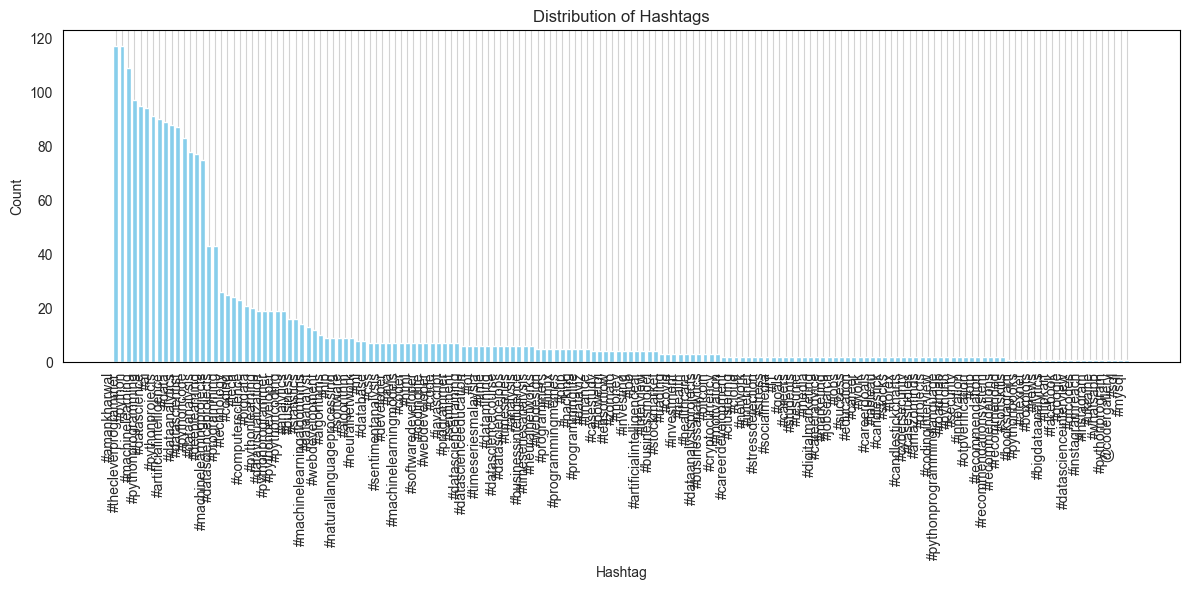

In [45]:
# Create a list to store all hashtags
all_hashtags = []

# Iterate through each row in the 'Hashtags' column
for row in data['Hashtags']:
    hashtags = str(row).split()
    hashtags = [tag.strip() for tag in hashtags]
    all_hashtags.extend(hashtags)

# Create a pandas DataFrame to store the hashtag distribution
hashtag_distribution = pd.Series(all_hashtags).value_counts().reset_index()
hashtag_distribution.columns = ['Hashtag', 'Count']

# Create a bar plot using Matplotlib
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(hashtag_distribution['Hashtag'], hashtag_distribution['Count'], color='skyblue')

# Add titles and labels
plt.title('Distribution of Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.0)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create a dictionary to store the likes and impressions for each hashtag
hashtag_likes = {}
hashtag_impressions = {}

# Iterate through each row in the dataset
for index, row in data.iterrows():
    hashtags = str(row['Hashtags']).split()
    for hashtag in hashtags:
        hashtag = hashtag.strip()
        if hashtag not in hashtag_likes:
            hashtag_likes[hashtag] = 0
            hashtag_impressions[hashtag] = 0
        hashtag_likes[hashtag] += row['Likes']
        hashtag_impressions[hashtag] += row['Impressions']

# Create a DataFrame for likes distribution
likes_distribution = pd.DataFrame(list(hashtag_likes.items()), columns=['Hashtag', 'Likes'])

# Create a DataFrame for impressions distribution
impressions_distribution = pd.DataFrame(list(hashtag_impressions.items()), columns=['Hashtag', 'Impressions'])

# Plot Likes Distribution
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(likes_distribution['Hashtag'], likes_distribution['Likes'], color='lightblue')
plt.title('Likes Distribution for Each Hashtag')
plt.xlabel('Hashtag')
plt.ylabel('Likes')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot Impressions Distribution
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(impressions_distribution['Hashtag'], impressions_distribution['Impressions'], color='salmon')
plt.title('Impressions Distribution for Each Hashtag')
plt.xlabel('Hashtag')
plt.ylabel('Impressions')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()